In [24]:

import pandas as pd
from prophet import Prophet




In [25]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)


             ds             y
0    2022-09-13  20296.707031
1    2022-09-14  20241.089844
2    2022-09-15  19701.210938
3    2022-09-16  19772.583984
4    2022-09-17  20127.576172
..          ...           ...
361  2023-09-09  25895.677734
362  2023-09-10  25832.226563
363  2023-09-11  25162.654297
364  2023-09-12  25833.343750
365  2023-09-13  25887.992188

[366 rows x 2 columns]


In [26]:
prophet = Prophet()
prophet.fit(df)


23:22:11 - cmdstanpy - INFO - Chain [1] start processing
23:22:11 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = prophet.make_future_dataframe(periods=365)
print(future)


            ds
0   2022-09-13
1   2022-09-14
2   2022-09-15
3   2022-09-16
4   2022-09-17
..         ...
726 2024-09-08
727 2024-09-09
728 2024-09-10
729 2024-09-11
730 2024-09-12

[731 rows x 1 columns]


In [28]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)


,ds,yhat,yhat_lower,yhat_upper
531,2024-02-26,22106.708012,16319.631588,28327.329802
532,2024-02-27,22270.021907,16049.513799,28209.987098
533,2024-02-28,22149.578026,16096.620704,28265.595959
534,2024-02-29,22066.145818,16129.030841,28333.383509
535,2024-03-01,22065.719623,16075.867576,28421.225364
...,...,...,...,...
726,2024-09-08,16639.287863,-2692.606130,35913.551010
727,2024-09-09,16527.889943,-3396.319364,35645.288481
728,2024-09-10,16691.203838,-2895.212470,35758.341044
729,2024-09-11,16570.759957,-3271.395846,35761.472800


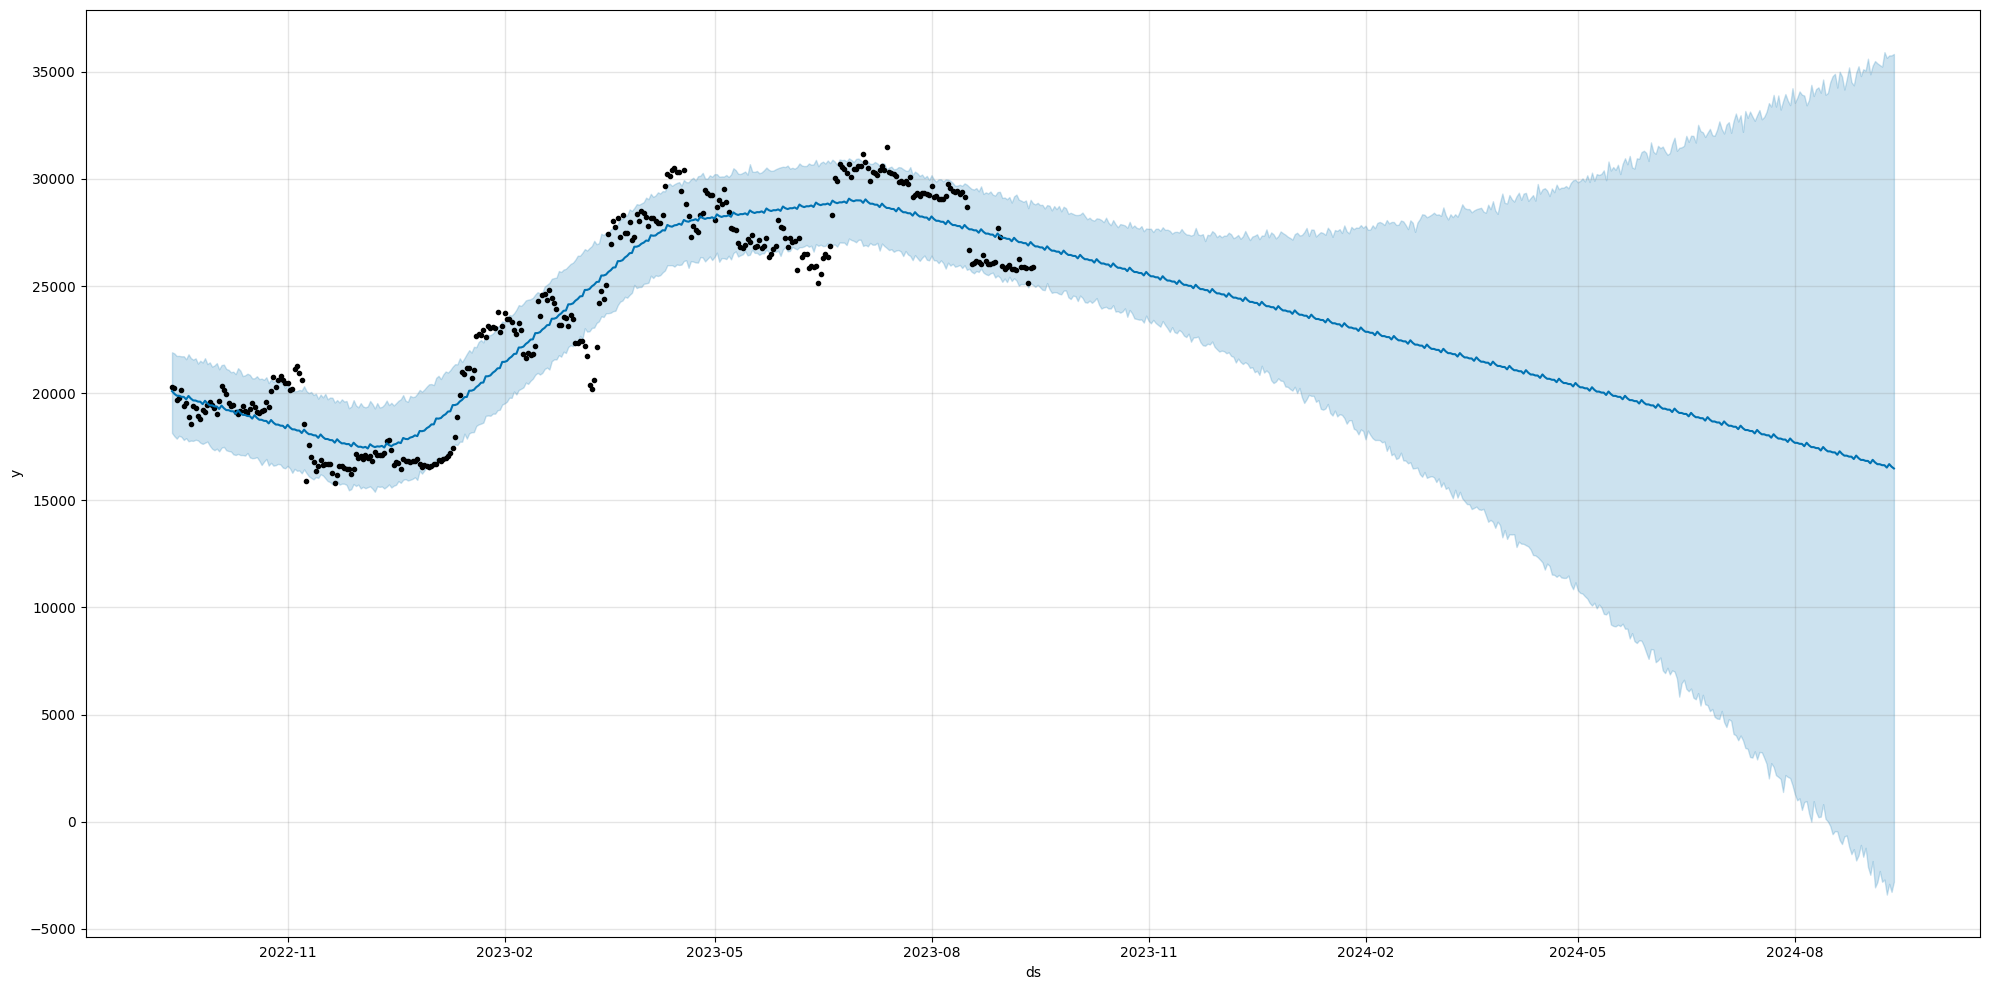

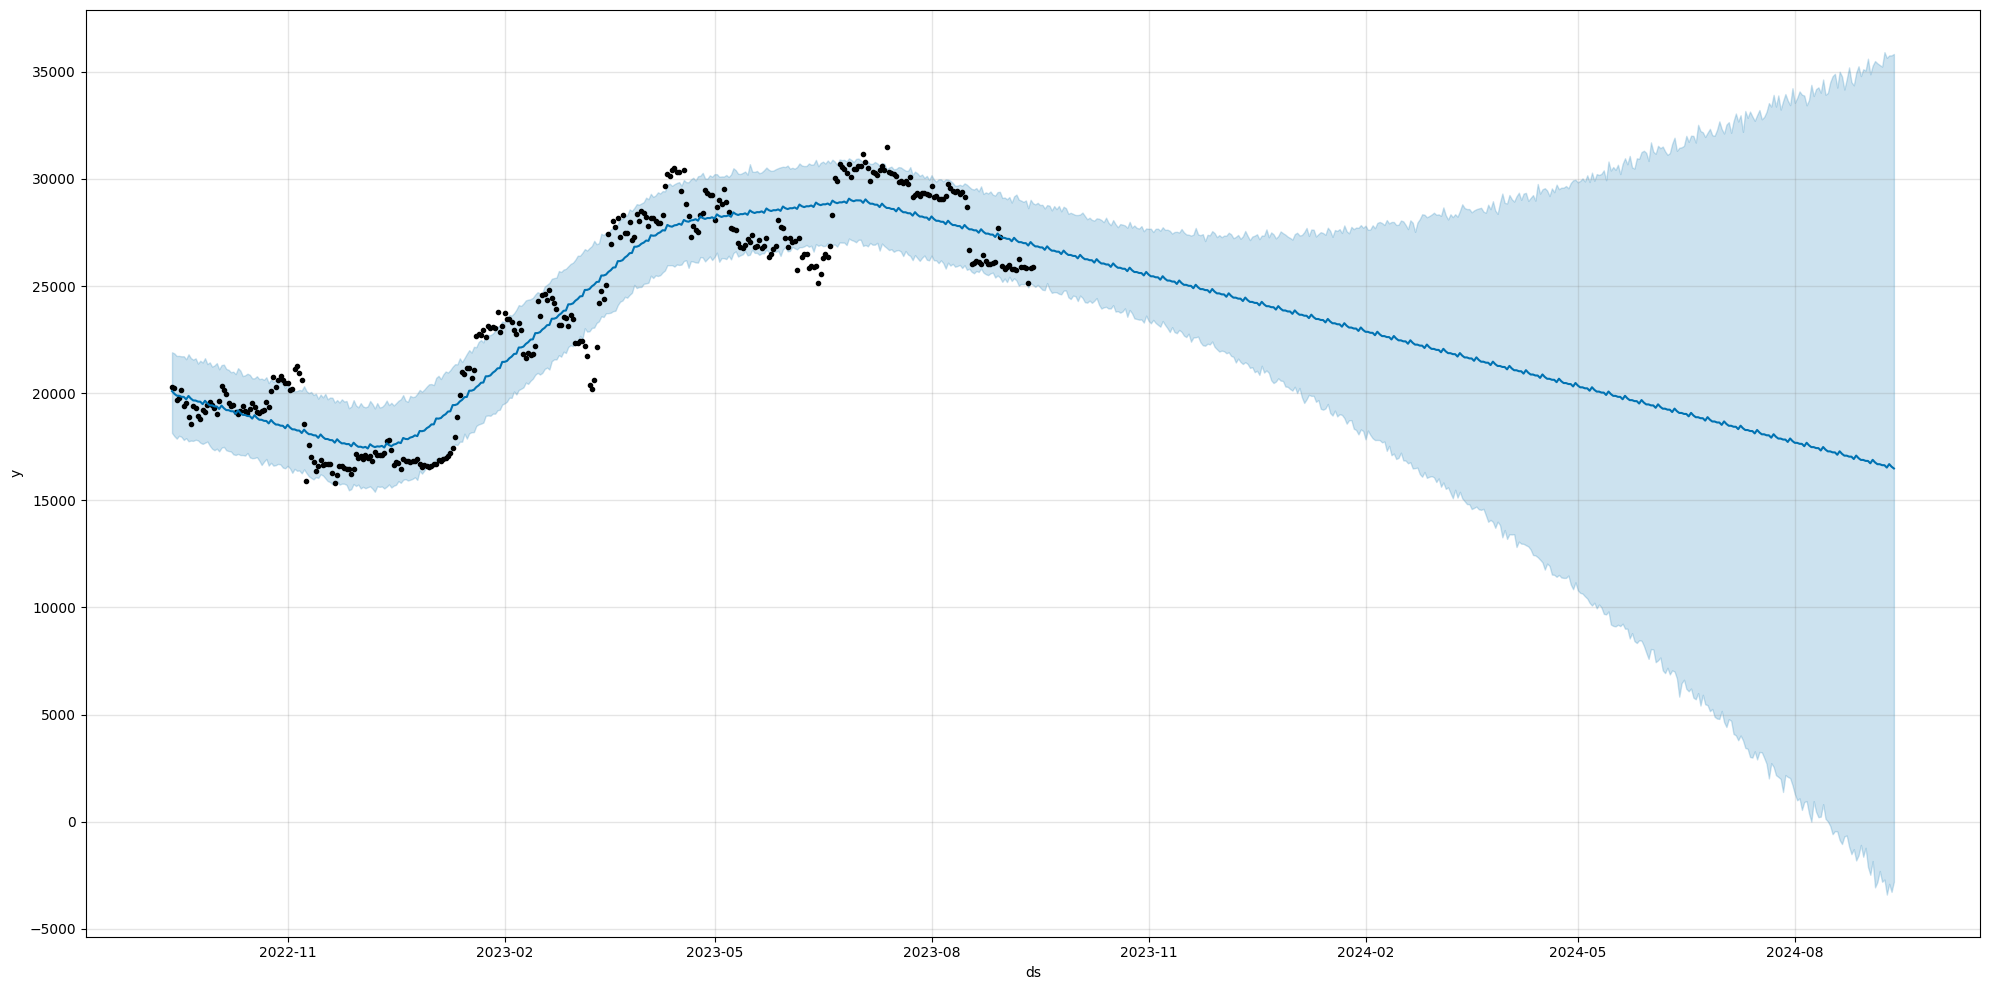

In [30]:
from prophet import Prophet
prophet.plot(forecast, figsize=(20, 10))
